## KNN regression model for predicting house price with Boston Housing Dataset

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math

boston=datasets.load_boston()
x=boston.data[:,:]
y=boston.target

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=102)

##function to find Euclidean distance
def edist(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))
##function to predict values using knn for given test data tx
def knn_reg(tr_x, tr_y, tx , k):
   
    distances = []
    
    #Find distances between new data and all the training data
    for i in range(tr_x.shape[0]):
        distances.append(edist(tr_x[i], tx))
    
    #sort the distances in ascending order
    distances = np.array(distances)
    inds = np.argsort(distances)
    
    distances = distances[inds]
    tr_y_sorted = tr_y[inds] #sorted values of target variable
    
    #predicted value is the average of first k values of target
    #vector
    value = np.average(tr_y_sorted[:k])
    return value

##Function to find mean squared error for the entire test dataset
def knn_mse(tr_x , tr_y, test_x , test_y , k):
    preds = []
    for i in range(test_x.shape[0]):
        value = knn_reg(tr_x, tr_y, test_x[i] , k)
        preds.append(value)
    
    preds  = np.array(preds)
    err = mean_squared_error(test_y , preds)
    return err

##Finding MSEs for different values of k 
maxk=int(math.sqrt(xtrain.shape[0])) #maximum value of k 
mse_val = [] #to store rmse values for different k
for k in range(1,maxk):
    error= knn_mse(xtrain , ytrain , xtest , ytest ,k)
    mse_val.append(error) #store rmse values
    print('MSE value for k= ' , k , 'is:', error)

MSE value for k=  1 is: 52.069736842105264
MSE value for k=  2 is: 41.056726973684206
MSE value for k=  3 is: 42.38861842105264
MSE value for k=  4 is: 44.16745065789473
MSE value for k=  5 is: 40.99719736842106
MSE value for k=  6 is: 39.929205043859646
MSE value for k=  7 is: 40.511697099892594
MSE value for k=  8 is: 38.973344983552636
MSE value for k=  9 is: 38.55725064977258
MSE value for k=  10 is: 38.853878289473684
MSE value for k=  11 is: 38.987844715093516
MSE value for k=  12 is: 40.50879797149122
MSE value for k=  13 is: 41.166428682653375
MSE value for k=  14 is: 43.0698419038668
MSE value for k=  15 is: 44.86796023391812
MSE value for k=  16 is: 46.46832879317434
MSE value for k=  17 is: 47.82060599162265


Best Value of k using elbow curve is  9


Text(9, 38.55725064977258, 'elbow point')

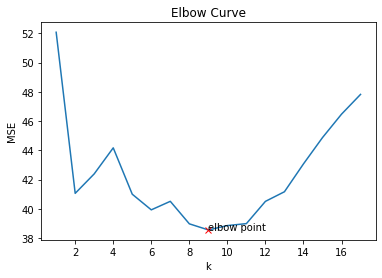

In [2]:
##plotting the elbow curve 
k=np.arange(1,maxk)
xl="k"
yl="MSE"
plt.xlabel(xl) 
plt.ylabel(yl)
plt.title("Elbow Curve")
plt.plot(k,mse_val)
##finding the k for the elbow point 
#ke=find_elbow()
ke = 9
print("Best Value of k using elbow curve is ",ke)
plt.plot(ke,mse_val[ke-1],'rx')
plt.annotate("elbow point", (ke,mse_val[ke-1]))

In [3]:
## Now model is ready to predict the cost for new house with given features in xnew vector and ke as k
xnew=np.array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00,  4.6900e-01, 6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02, 1.7800e+01, 3.9690e+02 ,9.1400e+00])
hcost=knn_reg(xtrain, ytrain, xnew , 9)
print("Predicted price of the given house is {:.2f}".format(hcost), "thousand dollars")

Predicted price of the given house is 24.00 thousand dollars
